# Notebooks that we used to analyze the survey data.

We hope this notebook will provide insights for future researchers using our system.
Aggregated results are provided as-is for demonstrating usage of these code; Data from individual participants will not be made public due to consenting reasons.

## Gather information from qualtrics

In [1]:
import sys
import scipy.stats

In [2]:
# Constants
try:
    import os
    with open("q_apikey.txt",'r') as f:
        Q_API_TOKEN = f.read()
except FileNotFoundError:
    print("Create a file named 'q_apikey.txt' and put in your qualtrics api key to continue.")
    sys.exit(2)
Q_DATA_CENTER = "iad1" # for gatech
Q_SURVEY_ID = "SV_eW2YWnPuG0ZWcmO"
Q_FILE_FORMAT = "csv"
Q_SURVEY_NAME = "CW2-Final" # Used to find name of the csv

from QualtricsHelper import *


In [3]:
# Use this to download survey results from Qualtrics

# result = exportSurvey(
#     apiToken=Q_API_TOKEN,
#     surveyId=Q_SURVEY_ID,
#     dataCenter=Q_DATA_CENTER,
#     fileFormat=Q_FILE_FORMAT,
# )

In [4]:
survey_csv = openSurveyCSV(Q_SURVEY_NAME)

# Filtering

# We only need survey that comes from qualtrics and are complete
result_df = survey_csv[survey_csv["DistributionChannel"] == "anonymous"]
result_df = result_df[result_df["Finished"] == "1"]
#result_df = result_df[pandas.isna(result_df["Q1"])]
result_df = result_df[pandas.isna(result_df["Ablation"]) == False ]

# Reindex dataframe with participant PIDs
result_df = result_df.set_index(["PROLIFIC_PID"])

# Generate json objects
survey_dict = result_df.to_dict("index")
for key in survey_dict:
    survey_dict[key]["logs"] = []
print(f"Done parsing survey, found {len(survey_dict.keys())} records.")

Done parsing survey, found 185 records.


# Associating surveys with logs

# Retrieve questions and counts, using filters

In [5]:
def get_count(filters:list):
    count = 0
    for key in survey_dict:
        entry = survey_dict[key]
        fit_condition = True
        for one_filter in filters:
            if entry[one_filter[0]] != one_filter[1]:
                fit_condition = False
                break
        if fit_condition:
            count += 1
    return count

import scipy

total = get_count([("UserLanguage","EN")])

keys_of_concern_prefix = "Q14.2#1_"
keys_of_concern = []
for i in range(7):
    keys_of_concern.append(keys_of_concern_prefix+str(i+1))

print(keys_of_concern)

# print("----- Overall -----")
# for key in keys_of_concern:
#     this_count = get_count([(key,"1")]) # Favor "Fish" = 1, other = 2
#     p_value = scipy.stats.binomtest(k=this_count,n=total,p=0.5,alternative="greater")
#
#     p_sig = " "
#     # if p_value.pvalue < 0.1:
#     #     p_sig ="^"
#     # if p_value.pvalue < 0.05:
#     #     p_sig = "*"
#     print(f"{this_count/total:.1%} {p_sig} ", end="")
#
#     #print(f"{key}:{this_count}/{total}, .{int(1000*this_count/total)}, p={p_value.pvalue}")
#     #print(f"{key}:{p_value}")
#
# Ablations = ["Apple","Hat","Eggplant","Rabbit","Grape","Leaf"]
# for ablation in Ablations:
#     #print(f"\n----- Ablation {ablation} -----")
#     print(f"\n{ablation}",end=" ")
#     for key in keys_of_concern:
#         this_total = get_count([("Ablation",ablation)])
#         this_count = get_count([(key,"1"),("Ablation",ablation)]) # Favor "Fish" = 1, other = 2
#         p_value = scipy.stats.binomtest(k=this_count,n=this_total,p=0.5,alternative="greater")
#         p_sig = " "
#         # if p_value.pvalue < 0.1:
#         #     p_sig ="^"
#         # if p_value.pvalue < 0.05:
#         #     p_sig = "*"
#         print(f"{this_count/this_total:.1%} {p_sig} ", end="")
#         #print(f"{key}:{this_count}/{this_total}, .{int(1000*this_count/this_total)}, p={p_value.pvalue}")
#         #print(f"{key}:{p_value}")

this_q = "Q4.1"
Ablations = ["1","2","3","4"]

def print_q(this_q,Ablations):
    print(this_q)
    for ablation in Ablations:
        #print(f"----- Q4.1 {ablation} -----")

        this_total = get_count([(this_q,ablation)])
        print(f"{ablation} {this_total} ",end="")
        for key in keys_of_concern:

            this_total = get_count([(this_q,ablation)])
            this_count = get_count([(key,"1"),(this_q,ablation)]) # Favor "Fish" = 1, other = 2
            p_value = scipy.stats.binomtest(k=this_count,n=this_total,p=0.5,alternative="greater")
            #print(f"{key}:{this_count}/{this_total}, .{int(1000*this_count/this_total)}, p={p_value.pvalue}")
            #print(f"{key}:{p_value}")
            print(f"{this_count/this_total:.1%} ",end="")
        print()

#
# Ablations = ["1","2","3","4"]
# for ablation in Ablations:
#     print(f"----- Q4.2 {ablation} -----")
#     for key in keys_of_concern:
#         this_total = get_count([("Q4.2",ablation)])
#         this_count = get_count([(key,"1"),("Q4.2",ablation)]) # Favor "Fish" = 1, other = 2
#         p_value = scipy.stats.binomtest(k=this_count,n=this_total,p=0.5,alternative="greater")
#         print(f"{key}:{this_count}/{this_total}, .{int(1000*this_count/this_total)}, p={p_value.pvalue}")
#         #print(f"{key}:{p_value}")
#
#
# Ablations = ["1","2","3"]
# for ablation in Ablations:
#     print(f"----- Q4.3 {ablation} -----")
#     for key in keys_of_concern:
#
#         this_total = get_count([("Q4.3",ablation)])
#         this_count = get_count([(key,"1"),("Q4.3",ablation)]) # Favor "Fish" = 1, other = 2
#         p_value = scipy.stats.binomtest(k=this_count,n=this_total,p=0.5,alternative="greater")
#         print(f"{key}:{this_count}/{this_total}, .{int(1000*this_count/this_total)}, p={p_value.pvalue}")
#         #print(f"{key}:{p_value}")
#
#

print_q("Q4.1",["1","2","3","4"])
print_q("Q4.2",["1","2","3","4"])
print_q("Q4.3",["1","2","3"])

['Q14.2#1_1', 'Q14.2#1_2', 'Q14.2#1_3', 'Q14.2#1_4', 'Q14.2#1_5', 'Q14.2#1_6', 'Q14.2#1_7']
Q4.1
1 3 33.3% 33.3% 33.3% 33.3% 33.3% 33.3% 33.3% 
2 44 61.4% 56.8% 54.5% 54.5% 61.4% 56.8% 56.8% 
3 62 66.1% 67.7% 72.6% 67.7% 66.1% 69.4% 71.0% 
4 76 60.5% 57.9% 60.5% 63.2% 53.9% 56.6% 57.9% 
Q4.2
1 94 63.8% 63.8% 60.6% 66.0% 64.9% 67.0% 66.0% 
2 65 52.3% 50.8% 66.2% 52.3% 46.2% 49.2% 53.8% 
3 21 81.0% 76.2% 61.9% 76.2% 71.4% 61.9% 61.9% 
4 5 80.0% 60.0% 60.0% 60.0% 80.0% 80.0% 80.0% 
Q4.3
1 29 48.3% 55.2% 48.3% 51.7% 48.3% 58.6% 58.6% 
2 107 66.4% 64.5% 67.3% 67.3% 61.7% 58.9% 63.6% 
3 49 61.2% 55.1% 61.2% 57.1% 61.2% 65.3% 59.2% 


[[       nan 0.73834347 0.4584546  0.60931677 0.78594874 0.5787183
  0.57606755]
 [0.73834347        nan 0.52079581 0.71553988 0.77499873 0.50220157
  0.59091101]
 [0.4584546  0.52079581        nan 0.4584546  0.50147247 0.42931968
  0.47161875]
 [0.60931677 0.71553988 0.4584546         nan 0.60433997 0.53311111
  0.5073111 ]
 [0.78594874 0.77499873 0.50147247 0.60433997        nan 0.59479479
  0.68407424]
 [0.5787183  0.50220157 0.42931968 0.53311111 0.59479479        nan
  0.68187713]
 [0.57606755 0.59091101 0.47161875 0.5073111  0.68407424 0.68187713
         nan]]


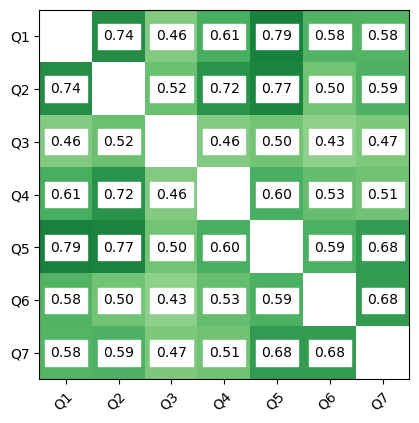

In [6]:
def answer_of_question(q:str):
    result = []
    for key in survey_dict:
        if q in survey_dict[key]:
            result.append(int(survey_dict[key][q]))
    return result

all_vectors = {}
for key in keys_of_concern:
    all_vectors[key] = answer_of_question(key)

import numpy as np
import matplotlib
result_corr = np.zeros([7,7])

idx1 = -1
for key in keys_of_concern:
    idx1 += 1
    idx2 = -1
    for key2 in keys_of_concern:
        idx2 += 1
        if key == key2:
            result_corr[idx1][idx2] = np.nan
        else:
        #if key < key2:

            corr = scipy.stats.pearsonr(all_vectors[key],all_vectors[key2])
            result_corr[idx1][idx2] = corr.statistic
            #print(f"corr {key} {key2}:{corr}")

print(result_corr)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(result_corr,cmap = 'Greens', vmin=0, vmax=1)

keys_of_concern_short = []
for item in keys_of_concern:
    keys_of_concern_short.append(f"Q{item[-1:]}")

ax.set_xticks(np.arange(len(keys_of_concern_short)), labels=keys_of_concern_short)
ax.set_yticks(np.arange(len(keys_of_concern_short)), labels=keys_of_concern_short)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(keys_of_concern)):
    for j in range(len(keys_of_concern)):
        if i==j:
            continue
        this_corr = f"{result_corr[i,j]:.2f}"

        text = ax.text(j, i, this_corr,
                       ha="center", va="center", color="k",backgroundcolor="w")

plt.show()


In [7]:
def get_answer_of_question_with_filter(question, filters:list):
    """
    if question is list, then it is treated as multiple questions.
    """
    result = []
    for key in survey_dict:
        entry = survey_dict[key]
        fit_condition = True
        for one_filter in filters:
            if entry[one_filter[0]] != one_filter[1]:
                fit_condition = False
                break
        if fit_condition:
            if type(question) is list:
                for q in question:
                    result.append(int(entry[q]))
            else:
                result.append(int(entry[question]))
    return result

def calculate_correlation(q1, filter1, q2, filter2):
    result1 = get_answer_of_question_with_filter(q1,filter1)
    result2 = get_answer_of_question_with_filter(q2,filter2)
    #print(f"len1 = {len(result1)}, len2 = {len(result2)}")
    #print(result1)
    return scipy.stats.ttest_ind(result1,result2,equal_var=False)

In [8]:
def print_corr(g1,g2):
    print(f"Group {g1} vs. group {g2}: ",end="")

    result = calculate_correlation(keys_of_concern,g1,keys_of_concern,g2)
    print(f"p-value = {result.pvalue}")

print_corr([("Q4.1","2")],[("Q4.1","3")])
print_corr([("Q4.1","2")],[("Q4.1","4")])
print_corr([("Q4.1","3")],[("Q4.1","4")])

print_corr([("Q4.2","1")],[("Q4.2","2")])
print_corr([("Q4.2","1")],[("Q4.2","3")])
print_corr([("Q4.2","2")],[("Q4.2","3")])

print_corr([("Q4.3","1")],[("Q4.3","2")])
print_corr([("Q4.3","1")],[("Q4.3","3")])
print_corr([("Q4.3","2")],[("Q4.3","3")])

#result = calculate_correlation(keys_of_concern,[("Q4.3","3")],keys_of_concern,[("Q4.1","2")])
#result = calculate_correlation(keys_of_concern,[("Q4.3","3")],keys_of_concern,[("Q4.1","2")])


Group [('Q4.1', '2')] vs. group [('Q4.1', '3')]: p-value = 0.0019319343884004626
Group [('Q4.1', '2')] vs. group [('Q4.1', '4')]: p-value = 0.7391609997902946
Group [('Q4.1', '3')] vs. group [('Q4.1', '4')]: p-value = 0.0012212432193144938
Group [('Q4.2', '1')] vs. group [('Q4.2', '2')]: p-value = 0.00011120719931383812
Group [('Q4.2', '1')] vs. group [('Q4.2', '3')]: p-value = 0.1960372033592154
Group [('Q4.2', '2')] vs. group [('Q4.2', '3')]: p-value = 0.00015492324146183133
Group [('Q4.3', '1')] vs. group [('Q4.3', '2')]: p-value = 0.0036210227762774657
Group [('Q4.3', '1')] vs. group [('Q4.3', '3')]: p-value = 0.09557552817470626
Group [('Q4.3', '2')] vs. group [('Q4.3', '3')]: p-value = 0.19062923448329389
